## 'Yet Sinned I Not But in Mistaking': *Much Ado About Nothing* and Male Inability to Confront Misogyny

### Danica Chen

13 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

In [1]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
import spacy
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA

In [2]:
filelist = ('maan.md', 'ayli.md', 'tn.md', 'tots.md', 'shakespeare-caesar.txt', 'shakespeare-caesar.txt', 'shakespeare-macbeth.txt')


maan = open('maan.md').read()
as_you_like_it = open('ayli.md').read()
twelfth_night = open('tn.md').read()
taming_ot_shrew = open('tots.md').read()
othello = open('oth.md').read()
hamlet = open('ham.md').read()
macbeth = open('macb.md').read()

               
maan_by_scene = maan.split('#SCENE')[1:18] #splits text by scene, removes first useless item
maan_pre_death = " ".join(maan_by_scene[0:10]) #Acts 1 to 3, before Claudio and Hero's wedding
maan_during_death = " ".join(maan_by_scene[11:15]) #Act 4 to Act 5 Scene 3, Hero "dying" and being mourned
maan_post_death = maan_by_scene[16] #last scene where Hero is revealed to be alive

shakespeare = (maan_pre_death, maan_during_death, maan_post_death, 
               as_you_like_it, twelfth_night, taming_ot_shrew, 
               othello, hamlet, macbeth)
shakespeare_titles = ('Much Ado (pre-death)', 'Much Ado (during death)', 'Much Ado (post-death)', 'As You Like It', 'Twelfth Night', 'Taming of the Shrew', 'Othello', 'Hamlet', 'MacBeth')
                      

The double meaning of the title of *Much Ado About Nothing*, with "nothing" literally meaning an absence of importance but subtextually referring to female genitalia, roughly represents the two major readings of the play that have emerged in Shakespearean scholarship. Some critics view the play as no more than fluff, a light "proto-romcom" comprising shallow relationships and easily resolved antics ("Much Ado About Nothing"). Others view the play as a window into the playwright's feminist side, with a strong-willed female lead poking fun at gender roles and a slutshamed woman's name restored despite society's judgement. Carol Cook, in "'The Sign and Semblance of Her Honor': Reading Gender Difference in *Much Ado about Nothing*", offers a reading that combines both interpretations, acknowledging the play's themes of sexism but highlighting the lack of moral improvement that reinforces the story's patriarchy. Despite the violent misogyny exposed by Claudio and Hero's failed wedding, the male characters' inability to understand how their sexism contributed to the debacle makes the play's ending feel hollow, as if the story was all for "nothing". Rather than recognize the cruelty with which they view women, the men of *Much Ado About Nothing* instead use humor to conquer their fear of cuckoldry, misinterpret women based on reasoning that confirms their preexisting beliefs, and simplify narratives of societal discord to distance themselves from personal responsibility. The corpora used in this analysis, in addition to six other Shakespeare plays  used for comparison, is *Much Ado About Nothing* divided into three parts: before Hero’s false death, Acts 1 to 3, during the period where Hero is believed to be dead, Acts 4 to Act 5 Scene 3, and after she is revealed to be alive, Act 5 Scene 4. Doing so illuminates the difference between how men respond to their fear of women under normal and abnormal circumstances. 


In polite society, men relieve their fears of female infidelity by using humor as a socially acceptable way to assert power over women, most evident through the  imagery of cuckoldry throughout the play. Cuckoldry was associated in Shakespeare's time with the image of a man growing horns on his head, so uses of the word “horn” and animal imagery, especially bull metaphors, are often innuendos referencing the concept. The cuckold joke implies genuine "hostility and fear" about the topic, but subtly "revenges" men by returning women "to silence and absence" while focalizing the teller's perspective for "male camaraderie" (Cook 189). The graph below, depicting the frequency of words associated with cuckold imagery in each section of the play, lends credence to this assertion, specifically emphasizing the joke's role as a social mask. Although the method cannot catch subtle mentions of cuckoldry, such as when Leonato says that Hero's mother "hath many times" told him that Hero is his daughter and not another man's (1.1.103), even observing a handful of words reveals a meaningful trend. 


<AxesSubplot:>

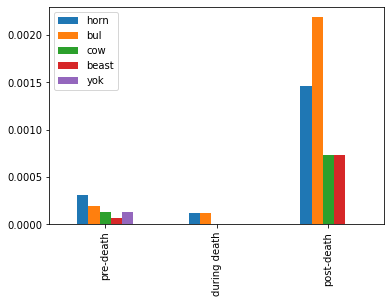

In [3]:
stemmer = LancasterStemmer() #code that can stem words 

def counter(textstring):
    lowered = textstring.lower() # converting all words to lowercase so they will be grouped together
    tokens = nltk.word_tokenize(lowered) # turning string into list of tokens
    stems = [stemmer.stem(token) for token in tokens] #turning tokens into stems
    counted = Counter(stems) #counting the amount of times each stem appears in list
    return counted

def numwords(textstring):
    lowered = textstring.lower() 
    tokens = nltk.word_tokenize(lowered)
    return len(tokens) #returning length of word list, which is equal to the word count

allwords = [numwords(scene) for scene in [maan_pre_death, maan_during_death, maan_post_death]] #calculates number of words in each text in the corpora
    
maan_token_counts = {"pre-death": counter(maan_pre_death), "during death": counter(maan_during_death), "post-death": counter(maan_post_death)} #creating dictionary of token counts for each section
scene_counts_DF = pd.DataFrame(maan_token_counts).fillna(0) #chart of the amount of times a word shows up in a part
scenes_freq_DF = scene_counts_DF / allwords #chart of the frequency of a word in a part
scenes_freq_DF.loc[['horn', 'bul', 'cow', 'beast', 'yok']].swapaxes("index", "columns").plot(kind='bar') #graphs the words related to cuckold imagery, specifically the stems for "horn", "bull", "cow", "beast", and "yoke"


In the "pre-death" period, the jokes are sporadic, but appear alongside doubt about marriage. When Claudio asks Benedick if he approves of a marriage between him and Hero, Benedick retorts that Claudio may as well "thrust [his] neck into a yoke" (1.1.197). When Don Pedro argues Benedick himself will likely marry someday, Benedick responds asking him to pick out a pair of "horns" and "set them in [his] forehead" (1.1.258-9). Claudio comes to Benedick with a "cap of suspicion", hoping "to assess the lady's merit and other men's opinions" before entering into marriage with a potential cheater (Cook 192). Benedick's comments alleviate these fears by returning Hero to "absence" and centering male experience–notably, only men are present in these jokes, while women are only implied by association with the “yoke” and “horns” of marriage. Benedick’s jokes mitigate Claudio’s fear of betrayal by rhetorically eliminating Hero from the idea of marriage, focusing solely on men instead. When anxiety about infidelity becomes anger, the rhetoric reverses, exclusively targeting female vice. This can be briefly seen in the “pre-death” period when Claudio suspects Don Pedro has wooed Hero away from him and calls Hero a “witch” who has charmed him into evil (2.1.177), ignoring Don Pedro's active role in the wooing. Anger supersedes niceties, and his true viciousness emerges. However, this is most notable in the “during death” section of the play, in which Claudio, convinced of Hero’s supposed betrayal, unleashes a barrage of insults on her, calling her a “rotten orange” (4.1.32), an “approved wanton” (4.1.45), a “contaminated stale” (4.1.68), and so on. The one use of “bull” and “horn” in this section is when Claudio echoes Benedick’s earlier “horns” joke as a failed attempt at restoring their previous camaraderie. The implication of cuckoldry declines when Claudio makes his feelings directly and brutally known. By the end of the play, Claudio’s renewed anxieties about marriage as well as his heightened desire for social normalcy result in the return of cuckold humor. Before his marriage to the “stranger” he soon learns is Hero, Claudio asks Benedick when he will “tip [his] horns with gold” (5.4.45), hoping that his friend will once again partake in stress-relieving banter with him. The pattern demonstrated in the word frequency graph shows that the men of Messina tell cuckold jokes as a socially permissible way of hiding their chauvinistic anxiety about infidelity.

Another way the men in the play try to obscure their misogyny is by forming opinions about a woman based on their own conjecture rather than her testimony, most notably Hero, whose obedient and quiet demeanor make her a “cipher” for men to “fill with their own meaning” (Cook 191). The graph below shows the amount of times each character speaks over the amount of times each character is spoken about. Since the format of the play used in this analysis uses names in all uppercase letters to denote the beginning of a character’s dialogue, the speaker versus subject ratio can be determined by calculating the amount of times a character’s name appears in all uppercase letters and all lowercase letters, then divide the former number by the latter. This calculation shows that while male main characters all speak at least twice as much as they are talked about (Pedro, at 33.75, is an omitted outlier from the graph), Hero’s proportion is only 0.74, meaning she is the only character to be talked about more than she speaks. This method does not account for the length of each piece of character dialogue, only instances, but it still shows that others speak about Hero more than she has an opportunity to represent herself.


<AxesSubplot:>

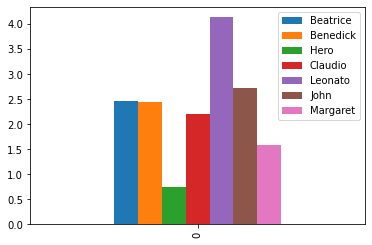

In [4]:
def counter_case_sensitive(textstring):
    tokens = nltk.word_tokenize(textstring) 
    counted = Counter(tokens) 
    return counted

maan_token_count_case_sensitive = {'maan': counter_case_sensitive(maan)} #counter on text of play that considers uppercase and lowercase when sorting
main_char_list = ['Beatrice', 'Benedick', 'Hero', 'Claudio', 'Leonato', 'John', 'Margaret'] #creating list of some main characters
case_sensitive_DF = pd.DataFrame(maan_token_count_case_sensitive) #table of token counts

def speaking_vs_spoken_of(lst, df):
    proportions = {}
    for name in lst:
         proportions[name] = [df.loc[name.upper()][0]/df.loc[name][0]] #creates dictionary with a character name as a key and the count of their name in uppercase divided by their name in lowercase
    return proportions

speaking_diff_char_list = speaking_vs_spoken_of(main_char_list, case_sensitive_DF) #runs above function on the play
pd.DataFrame(speaking_diff_char_list).plot(kind='bar') #creates graph of uppercase name appearances over lowercase appearances for each character

Hero is stereotyped by men throughout the play, but the behavior is epitomized by Claudio and her father during the wedding scene. Though Hero insists on her innocence, Claudio points to her blush and claims it is “guiltiness, not modesty” (4.1.42) that causes it. Claudio supports his accusations with the illusion of deductive reasoning, asserting that Hero’s expression rather than his paranoia is the foundation of his fury. Hero asks who could slander her to such a degree, and Claudio insists: “Marry, that can Hero!/Hero itself can blot out Hero’s virtue” (4.1.87). Claudio means the name ‘Hero’ literally–he believes Hero cheated because he heard Borachio court Margaret while crying Hero’s name–but the repetition of her name also emphasizes her responsibility for the transgression. Ironically, Claudio accuses Hero of being the only person who can expose herself for wrongdoing while referencing the faulty evidence that manipulated him. Unable to recognize his irrational jealousy, Claudio acts like Hero is exhibiting behavior that aligns with his biases, creating a pseudo-logical basis for his unreasonable assumptions. 
Hero’s own father does the same soon after, becoming instantly convinced based on the “story that is printed in her blood” (4.1.130) that she is guilty, declaring, “Do not live, Hero, do not ope thine eyes” (4.1.131). Just like Claudio, Hero’s father interprets Hero’s flushed cheeks as her display of shame rather than considering that his stance may be related to internal prejudices. Before she can say a word to defend herself to him, he decides without doubt that she ought to be killed, permanently silencing a woman who barely had a chance to speak. The rapidness of his death sentence shows just how highly he values his incorrect interpretation of Hero’s sins over her words. Men, believing they can “read” Hero, reject her “authority to voice her own nature” in favor of their flawed analysis (Cook 195). 


Finally, when confronted with obvious proof of their mistakes, the men of *Much Ado About Nothing* act out a tragic narrative in order to simplify the complex roots of societal ills. Unable to reflect on the “fundamental structures of Messina's masculine ethos” that influenced Hero’s downfall, the male characters enter a “formalized dramatic world” in which “ritual resolution” is enough to absolve Claudio (Cook 198). Hero’s false death turns her into a sacrifice while Don John becomes the scapegoat, the former “bringing about Messina's atonement through her death” and the latter “carrying off its sin” (199). Through the dramatized process of mourning the living Hero, the play’s men create a false tragedy so they can put themselves through a romanticized yet ineffective version of growth. The “during death” phase of the novel depicts this prolonged deceit, as is evident from the style shift closer to tragedy represented in the graph below. The data is limited, using only three tragedies and three comedies and with the comedies too spread out to analyze, but the tragedies occupy a shared space that confirm the genre-shifting nature of the ritual.  


/Users/Athena4242424242/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


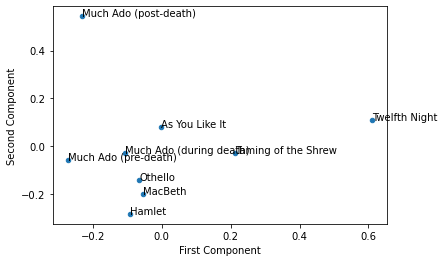

In [5]:
tfidf = TfidfVectorizer(use_idf=False, min_df=8, stop_words='english') 
ShakespeareFreq = tfidf.fit_transform(shakespeare).todense() #creates matrix of word frequencies for all documents
pca = PCA(n_components=2) 
ShakeReduced = pca.fit_transform(ShakespeareFreq) #reduces matrix to only two components
StyleDF = pd.DataFrame(ShakeReduced, columns=['First Component', 'Second Component'], index=shakespeare_titles) #puts the information in a table and uses the titles of the plays as labels 
ax = StyleDF.plot(kind='scatter', x='First Component', y='Second Component') #graphs above information

for play, points in StyleDF.iterrows():
    ax.annotate(play, points) #assigns a title to each point in the graph representing the corresponding play

Many points in the “during death” phase reflect moments or conventions from other Shakespearean tragedies. For instance, when Benedick challenges Claudio to a duel, he accuses him of having “killed a sweet and innocent lady” (5.1.203-204). In *Othello*, Emilia rails against Othello for having “killed the sweetest innocent” that ever lived (5.2.237). Benedick’s language connects their situation closer to tragedy and puts Hero on a pedestal, characterizing her dead persona as the perfect sinless sacrifice. After Claudio is finally told that he was tricked by Don John, he says that he had metaphorically “drunk poison” while hearing the news (5.1.256). This echoes a common type of death for Shakespeare characters consumed by grief–for example, Gertrude dies this way at the end of *Hamlet*. Don Pedro then curses his brother’s “villainy”, echoing Emilia’s repeated cries of “villainy, villainy, villainy” in her rage at Othello (5.2.227). Don Pedro’s designation of Don John as the villain quickly removes any liability from himself and Claudio by assigning it all to one definitively evil mastermind; Claudio was only wrong for “mistaking” Don John's schemes as fact (5.1.287). 
With the sacrifice and scapegoat set up through tragic parallels, the characters then carry out their ritual, but their formal language emphasizes to the lack of genuine growth taking place. Leonato decides on a “sad invention” Claudio can partake in to redeem himself, commanding him to visit Hero’s tomb and sing to it. The use of the word “invention” immediately calls attention to the false circumstances surrounding their pain, serving as a reminder that Claudio’s punishment is pure pageantry–his apology is not directed at the real living Hero that he hurt, but her tomb, a symbol of the dead “sacrificed” Hero. At the end of Claudio’s song, Don Pedro dismisses the group, noting the day “Before the wheels of Phoebus, round about/Dapples the drowsy east with spots of gray” (5.3.26-27). The iambic pentameter and mythological reference of this goodbye mimics the format and allusions of other Shakespearean tragedies–in *Othello*, the line “I know not where is that Promethean heat/That can thy light relume” (5.1.12-13) also references Greek myth in iambic pentameter–and in doing so highlights the constructed nature of the funeral, his elegant language out of step with the breezy, conversational dialogue that is natural to him. The “during death” portion is tonally unfit with the rest of the play, but deliberately so: the men of *Much Ado About Nothing* create rituals that transform the consequences of their misogynistic actions into dramatized tragedies, purging their sins without having to challenge patriarchal systems. 


Using computational literary techniques to analyze the text of *Much Ado About Nothing*, the data supports and expands upon Carol Cook’s claims about the unaddressed vein of misogyny in the social order of the play. By finding the frequencies of terms related to cuckold imagery, it becomes clear that men in the play use cuckold jokes not just for bonding but as a direct response to marital anxiety. Calculating the proportion of times a speaker’s dialogue appears over the amount of times their name was referenced in dialogue proves that Hero speaks significantly less than men and is incorrectly read by others far more often. Finally, through a stylometric analysis of Shakespeare’s comedies and tragedies, it i that the middle section of *Much Ado About Nothing* more resembles a tragedy than a comedy, due in large part to the characters purposefully performing a dramatized mourning ritual designed to distance themselves from true change. The future of computational text analysis only offers more potential for new understandings, and hopefully scholars in this modern area of study will continue to find value in exploring texts that are far from new, yet far from irrelevant. Fortunately, unlike the men of Messina, digital humanists work in a field that embraces change, and remains joyfully open to the possibility of discovery. 


## Works Cited

Cook, Carol. “‘The Sign and Semblance of Her Honor’: Reading Gender Difference in Much Ado about Nothing.” *PMLA*, vol. 101, no. 2, 1986, pp. 186–202. *JSTOR*, 
        https://doi.org/10.2307/462403. Accessed 10 Aug. 2022.
        
        
“Much Ado About Nothing - Shakespeare Month the Third.” *YouTube*, uploaded by Brows Held High [Kallgren, K.], 11 Aug. 2015, https://www.youtube.com/watch?v=Jnqz-_k2icY.

Shakespeare, William. *Hamlet* from The Folger Shakespeare. Ed. Barbara Mowat, Paul Werstine, Michael Poston, and Rebecca Niles. Folger 
        Shakespeare Library, https://shakespeare.folger.edu/shakespeares-works/hamlet. Accessed 10 Aug 2022. 

Shakespeare, William. *Much Ado About Nothing* from The Folger Shakespeare. Ed. Barbara Mowat, Paul Werstine, Michael Poston, and Rebecca Niles. Folger 
        Shakespeare Library, https://shakespeare.folger.edu/shakespeares-works/much-ado-about-nothing. Accessed 10 Aug 2022. 

Shakespeare, William. *Othello* from The Folger Shakespeare. Ed. Barbara Mowat, Paul Werstine, Michael Poston, and Rebecca Niles. Folger 
        Shakespeare Library, https://shakespeare.folger.edu/shakespeares-works/othello. Accessed 10 Aug 2022. 
   
   
   